In [267]:
from bs4 import BeautifulSoup
from bs4 import ResultSet
import numpy as np
import pandas as pd
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats

In [268]:
dataset = pd.read_csv('dataset.csv', delimiter='|')

In [269]:
display(dataset)

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,819900.00,65.57,4,0,NaN,1,0,NaN,NaN,...,NaN,12504.19,0,1,1,ul. Zakole,Stogi,Gdańsk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,412024.00,26.01,1,2,primary,1,1,NaN,0.0,...,0.0,15840.98,1,0,0,NaN,Śródmieście,Gdańsk,54.349020,18.651800
2,Kompleks 5 apartamentów. Wysoki standard,2990000.00,150.00,8,4,secondary,1,0,1929.0,1.0,...,1.0,19933.33,1,0,0,ul. Wójta Radtkego,Śródmieście,Gdynia,54.522236,18.537335
3,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",416907.00,24.89,1,5,secondary,0,1,2022.0,1.0,...,0.0,16749.98,0,0,0,ul. Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
4,Apartament inwestycyjny Śląska 12 z umową najmu!,475820.00,25.72,1,0,secondary,0,1,2022.0,1.0,...,0.0,18500.00,0,0,0,ul. Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15188,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,584029.44,56.33,3,2.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15189,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,637009.92,61.44,3,3.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15190,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,497448.00,47.00,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15191,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,490039.20,46.30,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438


## Sprawdzanie wartości unikalnych w kolumnie 'number_of_rooms'

In [270]:
dataset['number_of_rooms'].value_counts()

number_of_rooms
2                5510
3                5307
4                2371
1                1030
5                 537
6                 208
7                  86
8                  52
9                  30
10                 23
12                  9
więcej niż 10       8
16                  3
13                  3
11                  2
20                  2
14                  2
18                  2
24                  2
17                  1
50                  1
35                  1
15                  1
19                  1
30                  1
Name: count, dtype: int64

### Usuwanie wierszy z wartością 'więcej niż 10'

In [271]:
dataset.drop(dataset[dataset['number_of_rooms'] == 'więcej niż 10'].index, inplace=True)

In [272]:
dataset['number_of_rooms'].value_counts()

number_of_rooms
2     5510
3     5307
4     2371
1     1030
5      537
6      208
7       86
8       52
9       30
10      23
12       9
16       3
13       3
11       2
20       2
14       2
18       2
24       2
17       1
50       1
35       1
15       1
19       1
30       1
Name: count, dtype: int64

## Sprawdzanie wartości unikalnych w kolumnie 'floor'

In [273]:
dataset['floor'].value_counts()

floor
1           1799
1.0         1675
0           1363
2           1335
0.0         1321
2.0         1271
3.0         1157
3           1148
4            760
4.0          729
5            292
5.0          270
6            145
> 10         139
7.0          119
6.0          116
7            113
8.0          102
8             93
10            68
10.0          68
9.0           66
9             56
11.0          25
17.0          20
12.0          19
14.0          13
13.0          11
15.0          11
16.0          10
18.0           4
suterena       3
poddasze       1
23.0           1
27.0           1
25.0           1
Name: count, dtype: int64

In [274]:
print(dataset.dtypes)

title                   object
overall_price          float64
area                   float64
number_of_rooms         object
floor                   object
type_of_market          object
parking                  int64
elevator                 int64
year_of_creation       float64
internet               float64
type_of_building        object
basement               float64
price_for_m2_in_PLN    float64
balcony                  int64
garden                   int64
terrace                  int64
street                  object
district                object
city                    object
latitude               float64
longtitude             float64
dtype: object


### Usuwanie wierszy z wartością '> 10', 'suterena', 'poddasze'

In [275]:
dataset.drop(dataset[dataset['floor'] == '> 10'].index, inplace=True)
dataset.drop(dataset[dataset['floor'] == 'suterena'].index, inplace=True)
dataset.drop(dataset[dataset['floor'] == 'poddasze'].index, inplace=True)

In [276]:
dataset['floor'].value_counts()

floor
1       1799
1.0     1675
0       1363
2       1335
0.0     1321
2.0     1271
3.0     1157
3       1148
4        760
4.0      729
5        292
5.0      270
6        145
7.0      119
6.0      116
7        113
8.0      102
8         93
10.0      68
10        68
9.0       66
9         56
11.0      25
17.0      20
12.0      19
14.0      13
13.0      11
15.0      11
16.0      10
18.0       4
23.0       1
27.0       1
25.0       1
Name: count, dtype: int64

## Sprawdzanie czy są oferty bez podanej ceny

In [277]:
dataset[dataset['overall_price'].isnull()]

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
8255,Hit! Kawalerka po remoncie na Chełmie,NaN,NaN,1,0.0,secondary,0,0,1990.0,0.0,...,0.0,12273.0,0,0,0,Łużycka,Chełm,gdansk,54.340363,18.627950
9812,Sopot Al. Niepodległości,NaN,NaN,1,2.0,secondary,1,0,2021.0,0.0,...,0.0,27227.0,1,0,0,Niepodległości,Dolny Sopot,sopot,54.440964,18.561271
10249,"Designerskie mieszkanie w kamienicy, Wrzeszcz",NaN,63.0,3,1.0,secondary,0,0,1904.0,0.0,...,1.0,NaN,0,0,0,Ks. Józefa Zator-Przytockiego,Wrzeszcz,gdansk,54.380035,18.609767
11950,Inwestycyjna nieruchomość Sopot,NaN,90.0,5,NaN,secondary,1,0,1967.0,0.0,...,1.0,NaN,1,1,0,null,Wyścigi / Karlikowo,sopot,54.433407,18.579679


### Usuwanie wierszy z brakującą ceną

In [278]:
dataset.drop(dataset[dataset['overall_price'].isnull()].index, inplace=True)

In [279]:
display(dataset)

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,819900.00,65.57,4,0,NaN,1,0,NaN,NaN,...,NaN,12504.19,0,1,1,ul. Zakole,Stogi,Gdańsk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,412024.00,26.01,1,2,primary,1,1,NaN,0.0,...,0.0,15840.98,1,0,0,NaN,Śródmieście,Gdańsk,54.349020,18.651800
2,Kompleks 5 apartamentów. Wysoki standard,2990000.00,150.00,8,4,secondary,1,0,1929.0,1.0,...,1.0,19933.33,1,0,0,ul. Wójta Radtkego,Śródmieście,Gdynia,54.522236,18.537335
3,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",416907.00,24.89,1,5,secondary,0,1,2022.0,1.0,...,0.0,16749.98,0,0,0,ul. Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
4,Apartament inwestycyjny Śląska 12 z umową najmu!,475820.00,25.72,1,0,secondary,0,1,2022.0,1.0,...,0.0,18500.00,0,0,0,ul. Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15188,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,584029.44,56.33,3,2.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15189,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,637009.92,61.44,3,3.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15190,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,497448.00,47.00,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15191,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,490039.20,46.30,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438


In [280]:
dataset['street'].replace('ul. ', '', regex=True, inplace=True)
display(dataset)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\1886226568.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['street'].replace('ul. ', '', regex=True, inplace=True)


,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,819900.00,65.57,4,0,NaN,1,0,NaN,NaN,...,NaN,12504.19,0,1,1,Zakole,Stogi,Gdańsk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,412024.00,26.01,1,2,primary,1,1,NaN,0.0,...,0.0,15840.98,1,0,0,NaN,Śródmieście,Gdańsk,54.349020,18.651800
2,Kompleks 5 apartamentów. Wysoki standard,2990000.00,150.00,8,4,secondary,1,0,1929.0,1.0,...,1.0,19933.33,1,0,0,Wójta Radtkego,Śródmieście,Gdynia,54.522236,18.537335
3,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",416907.00,24.89,1,5,secondary,0,1,2022.0,1.0,...,0.0,16749.98,0,0,0,Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
4,Apartament inwestycyjny Śląska 12 z umową najmu!,475820.00,25.72,1,0,secondary,0,1,2022.0,1.0,...,0.0,18500.00,0,0,0,Śląska 12,Przymorze Małe,Gdańsk,54.406171,18.576846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15188,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,584029.44,56.33,3,2.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15189,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,637009.92,61.44,3,3.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15190,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,497448.00,47.00,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15191,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,490039.20,46.30,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,Serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438


## Sprawdzanie wartości unikalnych w kolumnie 'street'

In [281]:
dataset['street'].value_counts()

street
 Serdecznikowa             3036
 null                       373
Starowiejska                101
Wielkopolska                 89
Kartuska                     83
                           ... 
 Nowowiczlińska               1
 Wąsowicza                    1
 Chylońska 51                 1
 Głogowska                    1
 Józefa Korzeniowskiego       1
Name: count, Length: 2286, dtype: int64

### Zamiana wartości na małe litery

In [282]:
dataset['street'] = dataset['street'].apply(lambda x: x.lower() if isinstance(x, str) else x)
dataset['street'].value_counts()

street
 serdecznikowa              3036
 null                        373
starowiejska                 101
wielkopolska                  89
kartuska                      83
                            ... 
 kilińskiego jana              1
 kazimierza małkowskiego       1
 żywiecka                      1
 zbigniewa herberta            1
 poziomkowa                    1
Name: count, Length: 2275, dtype: int64

## Sprawdzanie wartości unikalnych w kolumnie 'city'

In [283]:
dataset['city'].value_counts()

city
Gdańsk     5134
gdynia     4381
gdansk     3012
Gdynia     1769
sopot       372
Sopot       362
pucki         5
gdański       3
Name: count, dtype: int64

### Zamiana wartości na małe litery

In [284]:
dataset['city'] = dataset['city'].apply(lambda x: x.lower() if isinstance(x, str) else x)
dataset['city'].value_counts()

city
gdynia     6150
gdańsk     5134
gdansk     3012
sopot       734
pucki         5
gdański       3
Name: count, dtype: int64

### Zamiana wartości 'gdańsk' na 'gdansk'

In [285]:
dataset['city'].replace('gdańsk', 'gdansk', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\526403375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['city'].replace('gdańsk', 'gdansk', inplace=True)


In [286]:
dataset['city'].value_counts()

city
gdansk     8146
gdynia     6150
sopot       734
pucki         5
gdański       3
Name: count, dtype: int64

In [287]:
display(dataset)

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,819900.00,65.57,4,0,NaN,1,0,NaN,NaN,...,NaN,12504.19,0,1,1,zakole,Stogi,gdansk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,412024.00,26.01,1,2,primary,1,1,NaN,0.0,...,0.0,15840.98,1,0,0,NaN,Śródmieście,gdansk,54.349020,18.651800
2,Kompleks 5 apartamentów. Wysoki standard,2990000.00,150.00,8,4,secondary,1,0,1929.0,1.0,...,1.0,19933.33,1,0,0,wójta radtkego,Śródmieście,gdynia,54.522236,18.537335
3,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",416907.00,24.89,1,5,secondary,0,1,2022.0,1.0,...,0.0,16749.98,0,0,0,śląska 12,Przymorze Małe,gdansk,54.406171,18.576846
4,Apartament inwestycyjny Śląska 12 z umową najmu!,475820.00,25.72,1,0,secondary,0,1,2022.0,1.0,...,0.0,18500.00,0,0,0,śląska 12,Przymorze Małe,gdansk,54.406171,18.576846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15188,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,584029.44,56.33,3,2.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15189,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,637009.92,61.44,3,3.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15190,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,497448.00,47.00,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438
15191,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,490039.20,46.30,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,serdecznikowa,Dąbrowa,gdynia,54.471546,18.467438


## Sprawdzanie wartości unikalnych w kolumnie 'district'

In [288]:
dataset['district'].value_counts()

district
Dąbrowa                           3255
Śródmieście                       1498
Jasień                             820
Ujeścisko-Łostowice                558
Orunia Górna - Gdańsk Południe     503
                                  ... 
Orunia Dolna                         1
WILLOWA                              1
 Grabówek                            1
Chwarzno - Wiczlino                  1
Bernadowo                            1
Name: count, Length: 177, dtype: int64

In [289]:
dataset['district'] = dataset['district'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x)
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1504
jasień                             824
ujeścisko-łostowice                558
orunia górna - gdańsk południe     503
                                  ... 
chwarzno wiczlino                    1
orunia dolna                         1
willowa                              1
chwarzno - wiczlino                  1
bernadowo                            1
Name: count, Length: 141, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 1 (Przymorze i Chwarzno-Wiczlino)

In [290]:
dataset['district'].replace('przymorze wielkie', 'przymorze', inplace=True)
dataset['district'].replace('przymorze małe', 'przymorze', inplace=True)
dataset['district'].replace('wreszcz', 'wrzeszcz', inplace=True)
dataset['district'].replace('wiczlino', 'chwarzno-wiczlino', inplace=True)
dataset['district'].replace('chwarzno', 'chwarzno-wiczlino', inplace=True)
dataset['district'].replace('wiczlino ogród', 'chwarzno-wiczlino', inplace=True)
dataset['district'].replace('chwarzno wiczlino', 'chwarzno-wiczlino', inplace=True)
dataset['district'].replace('chwarzno - wiczlino', 'chwarzno-wiczlino', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\2155384658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('przymorze wielkie', 'przymorze', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\2155384658.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [291]:
dataset['district'].value_counts()

district
dąbrowa                3255
śródmieście            1504
jasień                  824
ujeścisko-łostowice     558
przymorze               523
                       ... 
łostwice                  1
zabianka                  1
orunia dolna              1
willowa                   1
bernadowo                 1
Name: count, Length: 133, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 2 (Ujeścisko-Łostowice)

In [292]:
dataset['district'].replace('łostowice', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('ujeścisko', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('ujeścisko - łostowice', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('ujeścisko łostowice', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('łostwice', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('zakoniczyn', 'ujeścisko-łostowice', inplace=True)
dataset['district'].replace('kowale', 'ujeścisko-łostowice', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\2657957644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('łostowice', 'ujeścisko-łostowice', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\2657957644.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [293]:
dataset['district'].value_counts()

district
dąbrowa                3255
śródmieście            1504
ujeścisko-łostowice     937
jasień                  824
przymorze               523
                       ... 
morenowe wzgórze          1
zabianka                  1
orunia dolna              1
willowa                   1
bernadowo                 1
Name: count, Length: 126, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 3 (Witomino)

In [294]:
dataset['district'].replace('witomino-radiostacja', 'witomino', inplace=True)
dataset['district'].replace('witomino-leśniczówka', 'witomino', inplace=True)
dataset['district'].replace('witonino', 'witomino', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\824679263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('witomino-radiostacja', 'witomino', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\824679263.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [295]:
dataset['district'].value_counts()

district
dąbrowa                3255
śródmieście            1504
ujeścisko-łostowice     937
jasień                  824
przymorze               523
                       ... 
morenowe wzgórze          1
zabianka                  1
orunia dolna              1
willowa                   1
bernadowo                 1
Name: count, Length: 123, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 4 (Orunie)

In [296]:
dataset['district'].replace('orunia górna', 'orunia górna - gdańsk południe', inplace=True)
dataset['district'].replace('orunia górna gdańsk południe', 'orunia górna - gdańsk południe', inplace=True)
dataset['district'].replace('orunia górna poludnie', 'orunia górna - gdańsk południe', inplace=True)
dataset['district'].replace('maćkowy', 'orunia górna - gdańsk południe', inplace=True)
dataset['district'].replace('orunia', 'orunia-św. wojciech-lipce', inplace=True)
dataset['district'].replace('świętego wojciecha', 'orunia-św. wojciech-lipce', inplace=True)
dataset['district'].replace('orunia dolna', 'orunia-św. wojciech-lipce', inplace=True)
dataset['district'].replace('św. wojciech', 'orunia-św. wojciech-lipce', inplace=True)
dataset['district'].replace('lipce', 'orunia-św. wojciech-lipce', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\4183681516.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('orunia górna', 'orunia górna - gdańsk południe', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\4183681516.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [297]:
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1504
ujeścisko-łostowice                937
jasień                             824
orunia górna - gdańsk południe     558
                                  ... 
świemierowo                          1
wzgórze świętego maksymiliana        1
zabianka                             1
willowa                              1
bernadowo                            1
Name: count, Length: 114, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 5 (Sobieszewo, żabianka i matarnia)

In [298]:
dataset['district'].replace('sobieszewo', 'wyspa sobieszewska', inplace=True)
dataset['district'].replace('sobieszewo', 'wyspa sobieszewska', inplace=True)
dataset['district'].replace('żabianka', 'Żabianka-Wejhera-Jelitkowo-Tysiąclecia', inplace=True)
dataset['district'].replace('jelitkowo', 'Żabianka-Wejhera-Jelitkowo-Tysiąclecia', inplace=True)
dataset['district'].replace('tysiąclecia', 'Żabianka-Wejhera-Jelitkowo-Tysiąclecia', inplace=True)
dataset['district'].replace('wejhera', 'Żabianka-Wejhera-Jelitkowo-Tysiąclecia', inplace=True)
dataset['district'].replace('zabianka', 'Żabianka-Wejhera-Jelitkowo-Tysiąclecia', inplace=True)
dataset['district'].replace('matarnia - rębiechowo', 'matarnia', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\1974314231.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('sobieszewo', 'wyspa sobieszewska', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\1974314231.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [299]:
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1504
ujeścisko-łostowice                937
jasień                             824
orunia górna - gdańsk południe     558
                                  ... 
chelm                                1
morenowe wzgórze                     1
wzgórze świętego maksymiliana        1
willowa                              1
bernadowo                            1
Name: count, Length: 108, dtype: int64

### Usuwanie wierszy które mają dzielnicę która powtarza się mniej niż 10 razy

In [300]:
dataset = dataset.groupby('district').filter(lambda x: len(x) > 9)
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1504
ujeścisko-łostowice                937
jasień                             824
orunia górna - gdańsk południe     558
                                  ... 
olszynka                            18
rudniki                             14
babie doły                          13
demptowo                            11
przeróbka                           10
Name: count, Length: 71, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 6 (pustki Cisowskie i Gdańsk Śródmieście)

In [301]:
dataset['district'].replace('pustki cisowskie', 'pustki cisowskie-demptowo', inplace=True)
dataset['district'].replace('demptowo', 'pustki cisowskie-demptowo', inplace=True)
dataset['district'].replace('wyścigi / karlikowo', 'karlikowo', inplace=True)
dataset['district'].replace('długie ogrody', 'śródmieście', inplace=True)
dataset['district'].replace('stare przedmieście', 'śródmieście', inplace=True)
dataset['district'].replace('gdańsk śródmieście', 'śródmieście', inplace=True)
dataset['district'].replace('dolne miasto', 'śródmieście', inplace=True)
dataset['district'].replace('młode miasto', 'śródmieście', inplace=True)
dataset['district'].replace('karczemki', 'kokoszki', inplace=True)
dataset['district'].replace('kiełpinek', 'jasień', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\380936052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('pustki cisowskie', 'pustki cisowskie-demptowo', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\380936052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [302]:
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1732
ujeścisko-łostowice                937
jasień                             845
orunia górna - gdańsk południe     558
                                  ... 
vii dwór                            19
olszynka                            18
rudniki                             14
babie doły                          13
przeróbka                           10
Name: count, Length: 63, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 7 (Zaspa)

In [303]:
dataset['district'].replace('zaspa-młyniec', 'zaspa', inplace=True)
dataset['district'].replace('zaspa-rozstaje', 'zaspa', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\4108432915.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('zaspa-młyniec', 'zaspa', inplace=True)
C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\4108432915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [304]:
dataset['district'].value_counts()

district
dąbrowa                           3255
śródmieście                       1732
ujeścisko-łostowice                937
jasień                             845
orunia górna - gdańsk południe     558
                                  ... 
vii dwór                            19
olszynka                            18
rudniki                             14
babie doły                          13
przeróbka                           10
Name: count, Length: 61, dtype: int64

### Uporządkowanie wartości w kolumnie 'district' - część 8 (Piecki-Migowo)

In [305]:
dataset['district'].replace('morena', 'piecki-migowo', inplace=True)

C:\Users\kubak\AppData\Local\Temp\ipykernel_5872\1474457062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['district'].replace('morena', 'piecki-migowo', inplace=True)


In [306]:
dataset['district'].value_counts()

district
dąbrowa                                   3255
śródmieście                               1732
ujeścisko-łostowice                        937
jasień                                     845
orunia górna - gdańsk południe             558
przymorze                                  523
piecki-migowo                              396
letnica                                    353
oliwa                                      332
siedlce                                    307
wrzeszcz górny                             269
chwarzno-wiczlino                          262
wrzeszcz                                   255
osowa                                      232
mały kack                                  212
chylonia                                   209
wyspa sobieszewska                         205
Żabianka-Wejhera-Jelitkowo-Tysiąclecia     195
górny sopot                                187
chełm                                      185
orunia-św. wojciech-lipce                  171
ciso

In [307]:
dataset[dataset['district'] == 'maćkowy']

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude


In [311]:
dataset['district'].value_counts()

district
dąbrowa                                   3255
śródmieście                               1732
ujeścisko-łostowice                        937
jasień                                     845
orunia górna - gdańsk południe             558
przymorze                                  523
piecki-migowo                              396
letnica                                    353
oliwa                                      332
siedlce                                    307
wrzeszcz górny                             269
chwarzno-wiczlino                          262
wrzeszcz                                   255
osowa                                      232
mały kack                                  212
chylonia                                   209
wyspa sobieszewska                         205
Żabianka-Wejhera-Jelitkowo-Tysiąclecia     195
górny sopot                                187
chełm                                      185
orunia-św. wojciech-lipce                  171
ciso

In [312]:
display(dataset)

,title,overall_price,area,number_of_rooms,floor,type_of_market,parking,elevator,year_of_creation,internet,...,basement,price_for_m2_in_PLN,balcony,garden,terrace,street,district,city,latitude,longtitude
0,4-pokojowe mieszkanie 65m2 + ogródek Bezpośrednio,819900.00,65.57,4,0.0,NaN,1,0,NaN,NaN,...,NaN,12504.19,0,1,1,zakole,stogi,gdansk,54.362472,18.709969
1,1 pokojowe + balkon INWESTYCYJNIe na DNI OTWARTE,412024.00,26.01,1,2.0,primary,1,1,NaN,0.0,...,0.0,15840.98,1,0,0,NaN,śródmieście,gdansk,54.349020,18.651800
2,Kompleks 5 apartamentów. Wysoki standard,2990000.00,150.00,8,4.0,secondary,1,0,1929.0,1.0,...,1.0,19933.33,1,0,0,wójta radtkego,śródmieście,gdynia,54.522236,18.537335
3,"Apartament inwestycyjny, ostatnie piętro, k/Sk...",416907.00,24.89,1,5.0,secondary,0,1,2022.0,1.0,...,0.0,16749.98,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
4,Apartament inwestycyjny Śląska 12 z umową najmu!,475820.00,25.72,1,0.0,secondary,0,1,2022.0,1.0,...,0.0,18500.00,0,0,0,śląska 12,przymorze,gdansk,54.406171,18.576846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14914,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 56.33 m2,584029.44,56.33,3,2.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14915,INPRO S.A. - OPTIMA - mieszkanie 3-pok. 61.44 m2,637009.92,61.44,3,3.0,primary,1,0,2024.0,1.0,...,1.0,10368.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14916,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 47.22 ...,497448.00,47.00,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438
14917,INPRO S.A. - OPTIMA - mieszkanie 2-pok. 46.30 ...,490039.20,46.30,2,1.0,primary,1,0,2025.0,1.0,...,1.0,10584.00,1,0,0,serdecznikowa,dąbrowa,gdynia,54.471546,18.467438


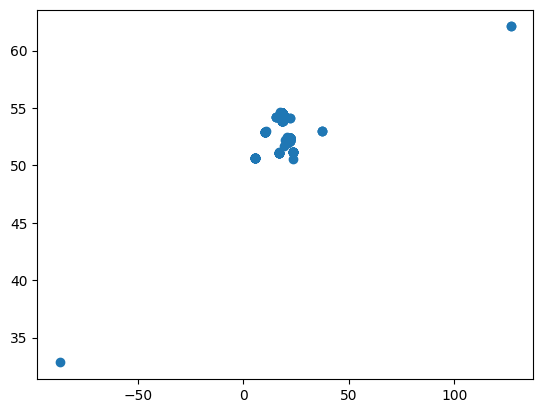

In [315]:
plt.scatter(dataset['longtitude'], dataset['latitude'])
plt.show()

In [317]:
dataset[dataset['longtitude'] < 0]
dataset.drop(dataset[dataset['longtitude'] < 0].index, inplace=True)

In [319]:
dataset[dataset['longtitude'] > 100]
dataset.drop(dataset[dataset['longtitude'] > 100].index, inplace=True)

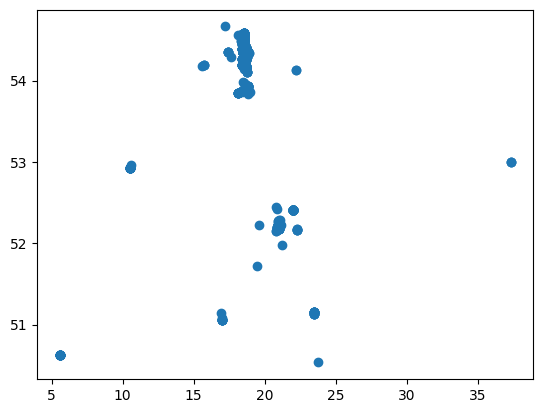

In [320]:
plt.scatter(dataset['longtitude'], dataset['latitude'])
plt.show()
